## Stock Price Prediction And Forecasting Using Stacked LSTM

#### In this mini-project we will look into predictions for stocks and also forecasting them 
LSTM is a great tool for this project due to its functionality and also its ability to store,update,remember data

In [1]:
from ipynb.fs.full.API_KEY import apikey
key=apikey()

In [2]:
import pandas_datareader as pdr

In [195]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

In [196]:
df.to_csv('AAPL.csv')

In [197]:
import pandas as pd

In [198]:
df=pd.read_csv('AAPL.csv')

In [199]:
df.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-11 00:00:00+00:00,108.43,108.870,106.5500,106.92,34143898,25.512733,25.616261,25.070384,25.157442,136575592,0.0,1.0
1,AAPL,2016-11-14 00:00:00+00:00,105.71,107.809,104.0800,107.32,51175504,24.872738,25.366616,24.489212,25.251559,204702016,0.0,1.0
2,AAPL,2016-11-15 00:00:00+00:00,107.11,107.680,106.1593,106.57,32264510,25.202147,25.336264,24.978455,25.075089,129058040,0.0,1.0
3,AAPL,2016-11-16 00:00:00+00:00,109.99,110.230,106.6000,106.70,58840522,25.879789,25.936259,25.082148,25.105677,235362088,0.0,1.0
4,AAPL,2016-11-17 00:00:00+00:00,109.95,110.350,108.8300,109.81,27632003,25.870377,25.964494,25.606850,25.837436,110528012,0.0,1.0
5,AAPL,2016-11-18 00:00:00+00:00,110.06,110.540,109.6600,109.72,28428917,25.896259,26.009199,25.802142,25.816260,113715668,0.0,1.0
6,AAPL,2016-11-21 00:00:00+00:00,111.73,111.990,110.0100,110.12,29264571,26.289197,26.350373,25.884495,25.910377,117058284,0.0,1.0
7,AAPL,2016-11-22 00:00:00+00:00,111.80,112.420,111.4000,111.95,25965534,26.305668,26.451549,26.211551,26.340961,103862136,0.0,1.0
8,AAPL,2016-11-23 00:00:00+00:00,111.23,111.510,110.3300,111.36,27426394,26.171551,26.237433,25.959788,26.202139,109705576,0.0,1.0
9,AAPL,2016-11-25 00:00:00+00:00,111.79,111.870,110.9500,111.13,11475922,26.303315,26.322138,26.105669,26.148022,45903688,0.0,1.0


In [200]:
df.tail(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1247,AAPL,2021-10-27 00:00:00+00:00,148.85,149.730,148.4900,149.360,56094929,148.633848,149.512570,148.274371,149.143108,56094929,0.00,1.0
1248,AAPL,2021-10-28 00:00:00+00:00,152.57,153.165,149.7200,149.820,100077888,152.348446,152.942582,149.502585,149.602440,100077888,0.00,1.0
1249,AAPL,2021-10-29 00:00:00+00:00,149.80,149.940,146.4128,147.215,124953168,149.582469,149.722265,146.200187,147.001222,124953168,0.00,1.0
1250,AAPL,2021-11-01 00:00:00+00:00,148.96,149.700,147.8000,148.985,73396551,148.743688,149.482614,147.585373,148.768652,73396551,0.00,1.0
1251,AAPL,2021-11-02 00:00:00+00:00,150.02,151.570,148.6500,148.660,68922374,149.802149,151.349898,148.434139,148.444124,68922374,0.00,1.0
1252,AAPL,2021-11-03 00:00:00+00:00,151.49,151.970,149.8200,150.390,54511534,151.270015,151.749317,149.602440,150.171612,54511534,0.00,1.0
1253,AAPL,2021-11-04 00:00:00+00:00,150.96,152.430,150.6400,151.580,60394616,150.740784,152.208650,150.421249,151.359884,60394616,0.00,1.0
1254,AAPL,2021-11-05 00:00:00+00:00,151.28,152.200,150.0600,151.890,65463883,151.280000,152.200000,150.060000,151.890000,65463883,0.22,1.0
1255,AAPL,2021-11-08 00:00:00+00:00,150.44,151.570,150.1600,151.410,55020868,150.440000,151.570000,150.160000,151.410000,55020868,0.00,1.0
1256,AAPL,2021-11-09 00:00:00+00:00,150.81,151.428,150.0601,150.200,56573449,150.810000,151.428000,150.060100,150.200000,56573449,0.00,1.0


In [201]:
df.shape

(1257, 14)

In [202]:
df1=df.reset_index().close

In [203]:
df1

0       108.43
1       105.71
2       107.11
3       109.99
4       109.95
         ...  
1252    151.49
1253    150.96
1254    151.28
1255    150.44
1256    150.81
Name: close, Length: 1257, dtype: float64

<AxesSubplot:>

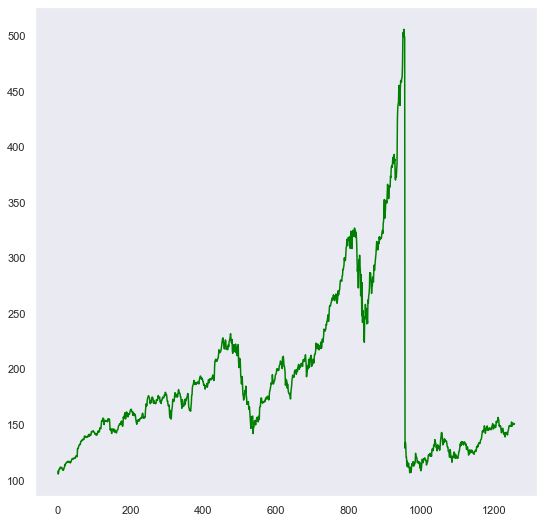

In [204]:
plt.figure(figsize=(9,9))
df1.plot(color='green')

In [205]:
import numpy as np

In [206]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
df1=scale.fit_transform(np.array(df1).reshape(-1,1))#here we need to give an array with 2d shape so reshapping it

In [207]:
df1.shape

(1257, 1)

In [208]:
##We now need to split into train,test but we cant use the train-test as it is because any split will randomize the values which makes it completely useless for the model
train_len=int(len(df1)*0.65)
train_data=df1[:train_len,:]
test_data=df1[train_len:,:]

In [209]:
def create_dataset(dataset,timestep=1):
    x_data,y_data=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]#here we will be slicing from dataset say we have 0th iteration and timestep=100 ...from 0 to (dataset.len-99) we will take values and append it
        x_data.append(a)
        #next we will take the timestamp+1 value as y value or y_train value
        y_data.append(dataset[i+timestep,0])
    return np.array(x_data),np.array(y_data)

In [210]:
x_train,y_train=create_dataset(train_data,100)
x_test,y_test=create_dataset(test_data,100)

In [211]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)#here we can use 716,100,1 but we need generalized model
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [212]:
x_train.shape

(716, 100, 1)

In [213]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

In [214]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
history=model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
12/12 [==============================] - 7s 245ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 2/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 3/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 4/100
12/12 [==============================] - 2s 130ms/step - loss: 6.9844e-04 - mean_squared_error: 6.9844e-04 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 5/100
12/12 [==============================] - 2s 129ms/step - loss: 5.7850e-04 - mean_squared_error: 5.7850e-04 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 6/100
12/12 [==============================] - 2s 132ms/step - loss: 5.3496e-04 - mean_squared_error: 5.3496e-04 - val_loss: 0.0265 - val_mean_squared_error: 0.026

Epoch 49/100
12/12 [==============================] - 2s 128ms/step - loss: 3.4157e-04 - mean_squared_error: 3.4157e-04 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 50/100
12/12 [==============================] - 2s 129ms/step - loss: 2.8599e-04 - mean_squared_error: 2.8599e-04 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 51/100
12/12 [==============================] - 2s 128ms/step - loss: 2.6287e-04 - mean_squared_error: 2.6287e-04 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 52/100
12/12 [==============================] - 1s 124ms/step - loss: 2.4376e-04 - mean_squared_error: 2.4376e-04 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 53/100
12/12 [==============================] - 2s 127ms/step - loss: 2.5646e-04 - mean_squared_error: 2.5646e-04 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 54/100
12/12 [==============================] - 2s 128ms/step - loss: 2.3557e-04 - mean_squared_error: 2.3557e-04 - val_loss: 0.0116 -

12/12 [==============================] - 2s 174ms/step - loss: 1.7879e-04 - mean_squared_error: 1.7879e-04 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 97/100
12/12 [==============================] - 2s 155ms/step - loss: 1.8461e-04 - mean_squared_error: 1.8461e-04 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 98/100
12/12 [==============================] - 2s 154ms/step - loss: 1.8828e-04 - mean_squared_error: 1.8828e-04 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 99/100
12/12 [==============================] - 2s 162ms/step - loss: 1.8658e-04 - mean_squared_error: 1.8658e-04 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 100/100
12/12 [==============================] - 2s 165ms/step - loss: 1.8005e-04 - mean_squared_error: 1.8005e-04 - val_loss: 0.0077 - val_mean_squared_error: 0.0077


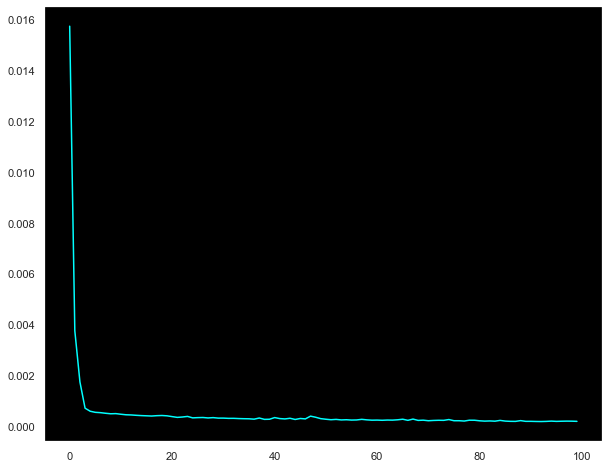

In [24]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
sb.set_style('dark')
plt.figure(figsize=(10,8))
ax=plt.axes()
ax.set_facecolor('black')
plt.plot(history.history['mean_squared_error'],color='cyan')

In [25]:
y_pred=model.predict(x_test)

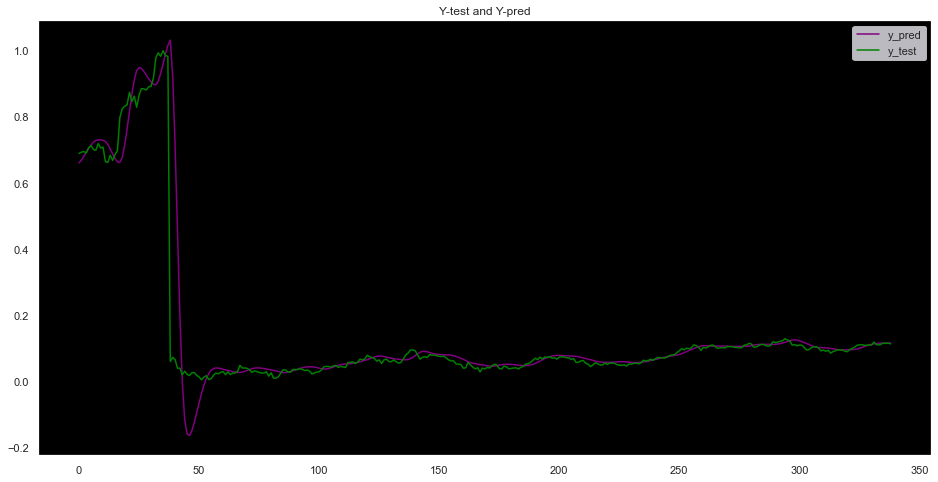

In [26]:
sb.set_style('dark')
plt.figure(figsize=(16,8))
ax=plt.axes()
ax.set_facecolor('black')
plt.plot(y_pred,color='purple')
plt.plot(y_test,color='green')
plt.title('Y-test and Y-pred')
plt.legend(['y_pred','y_test'])

In [27]:
y_pred_inverse=scale.inverse_transform(y_pred)

In [28]:
y_test_inverse=scale.inverse_transform(y_test.reshape(-1,1))

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
r2_score(y_test,y_pred)

0.8643108096891194

In [31]:
mean_squared_error(y_test,y_pred)

0.007715495176131607

In [32]:
import math
math.sqrt(mean_squared_error(y_test,y_pred))

0.08783789145995939

In [50]:
test_data_last_100=test_data[340:]

In [53]:
(test_data_last_100.reshape(1,100))

array([[0.06641191, 0.07060792, 0.06990859, 0.06918427, 0.06843499,
        0.07260602, 0.07647735, 0.07805085, 0.07882512, 0.08554373,
        0.09068885, 0.0970578 , 0.09373595, 0.09840651, 0.09688296,
        0.09973026, 0.10849693, 0.10682352, 0.10160348, 0.09176283,
        0.10100405, 0.09913083, 0.1026275 , 0.10702333, 0.10809731,
        0.10255258, 0.09808182, 0.09973026, 0.10027973, 0.09943054,
        0.10402618, 0.10300215, 0.10327689, 0.10097907, 0.10085419,
        0.09963035, 0.10027973, 0.10784754, 0.10837205, 0.11341725,
        0.11109446, 0.10152855, 0.10237774, 0.10609921, 0.1098956 ,
        0.10967081, 0.1065238 , 0.10447575, 0.10712323, 0.11841251,
        0.11519057, 0.11688896, 0.11973625, 0.12135971, 0.12732904,
        0.12338279, 0.12078525, 0.10804736, 0.10949598, 0.10592437,
        0.10819721, 0.10759778, 0.10077926, 0.09298666, 0.0942105 ,
        0.10025476, 0.10270243, 0.10292722, 0.0990559 , 0.09041411,
        0.09271192, 0.08939008, 0.09226235, 0.08

In [183]:
#now we will be predicting values for the  next 30 days using the previous values
#the concept remains the same use 100 values and predict the next value 
#then remove or disregard the first value and then use the same technique for the next prediction
x_input=test_data_last_100
temp_input=list(x_input)
lst_output=[]
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:]).astype('float32')
        x_input=x_input.reshape(1,100,1)
        y_temp=model.predict(x_input,verbose=0)
        temp_input.append(y_temp[0][0])
        temp_input=temp_input[1:]
        lst_output.append(y_temp[0][0])
        i=i+1
    else:
        x_input=x_input.reshape(1,100,1)
        y_temp=model.predict(x_input,verbose=0)
        temp_input.append(y_temp[0][0])
        lst_output.append(y_temp[0][0])
        i=i+1
print(lst_output)

<ipython-input-183-4da7e2584230>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_input=np.array(temp_input[1:]).astype('float32')


[0.11449109, 0.11468862, 0.11497556, 0.11534558, 0.115779325, 0.11625613, 0.116759196, 0.11727665, 0.117800996, 0.11832754, 0.11885363, 0.11937742, 0.11989759, 0.12041305, 0.12092283, 0.121426165, 0.12192242, 0.12241112, 0.12289207, 0.12336512, 0.12383032, 0.1242878, 0.12473786, 0.12518074, 0.12561682, 0.1260464, 0.12646985, 0.12688744, 0.12729956, 0.12770647]


In [184]:
pred_values=np.array(lst_output,dtype='object')

In [185]:
pred_values=scale.inverse_transform(pred_values.reshape(-1,1))

In [186]:
pred_values

array([[151.54994269],
       [151.62902966],
       [151.7439134 ],
       [151.89206427],
       [152.06572629],
       [152.25663042],
       [152.45804686],
       [152.66522659],
       [152.87516266],
       [153.08598172],
       [153.29661583],
       [153.50633116],
       [153.71459672],
       [153.92097698],
       [154.12508415],
       [154.32660798],
       [154.52529791],
       [154.72096301],
       [154.91352572],
       [155.10292639],
       [155.2891829 ],
       [155.47234896],
       [155.6525439 ],
       [155.82986315],
       [156.00446186],
       [156.17645933],
       [156.34599876],
       [156.5131935 ],
       [156.67819867],
       [156.8411157 ]])

Text(0.5, 1.0, 'Predicted values for next 30 Days')

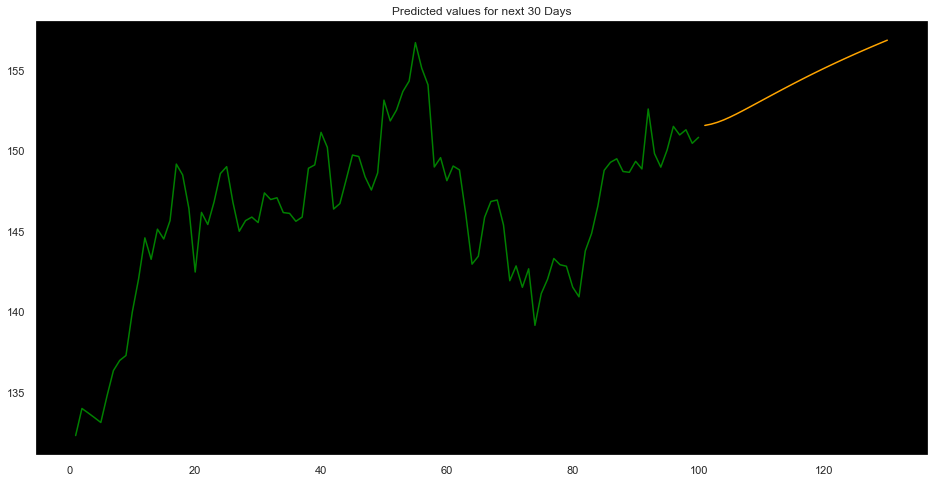

In [187]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
sb.set_style('dark')
plt.figure(figsize=(16,8))
ax=plt.axes()
ax.set_facecolor('black')
plt.plot(day_pred,pred_values,color='orange')
plt.plot(day_new,df1[1157:],color='green')
plt.title('Predicted values for next 30 Days')

In [188]:
df3=df1.tolist()
df3.extend(pred_values)
type(df3)

list

Text(0.5, 1.0, 'Predicted values for next 30 Days')

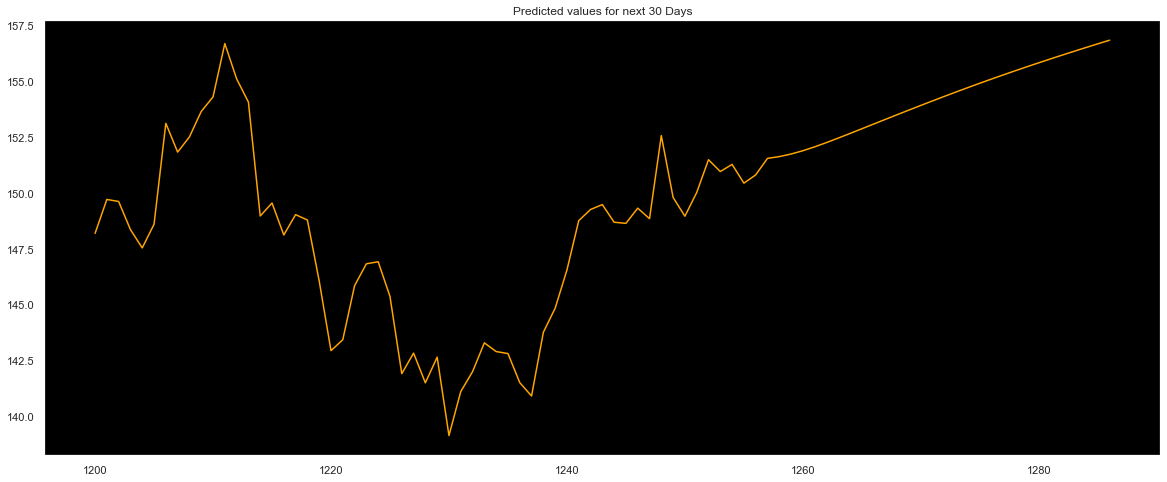

In [194]:
sb.set_style('dark')
plt.figure(figsize=(20,8))
ax=plt.axes()
ax.set_facecolor('black')
plt.plot(df3[1200:],color='orange')
plt.title('Predicted values for next 30 Days')

In [190]:
df3=df1.tolist()

In [191]:
df3.extend(pred_values)

In [192]:
df3=pd.Series(df3)

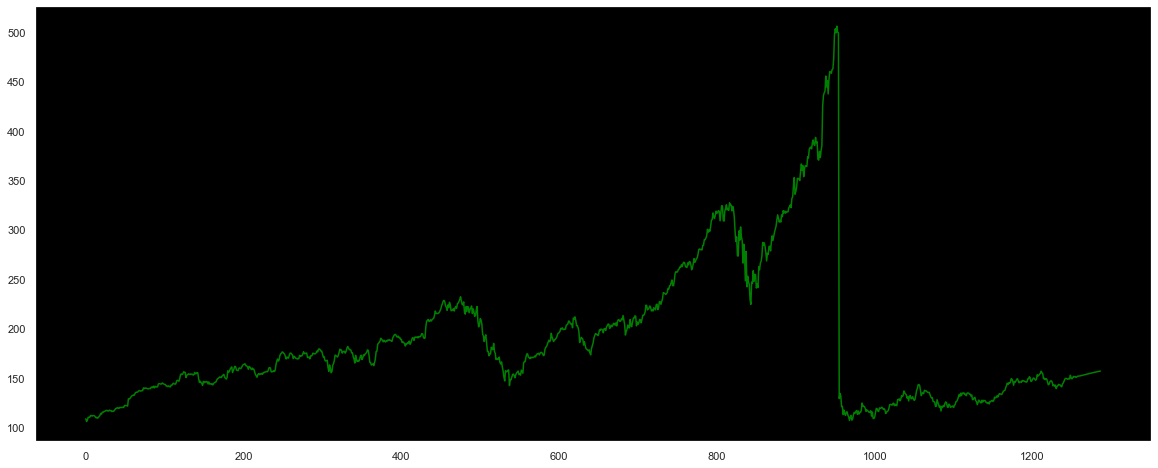

In [193]:
sb.set_style('dark')
plt.figure(figsize=(20,8))
ax=plt.axes()
ax.set_facecolor('black')
plt.plot(df3,color='green')